In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read csv file
insurance_df = pd.read_csv("insurance.csv")
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
# drop all columns except age and charges
insurance_df = insurance_df.drop(["bmi", "children", "sex", "smoker", "region"], axis = 1)
insurance_df.describe().round(2)

,age,charges
count,1338.00,1338.00
mean,39.21,13270.42
std,14.05,12110.01
min,18.00,1121.87
25%,27.00,4740.29
50%,39.00,9382.03
75%,51.00,16639.91
max,64.00,63770.43


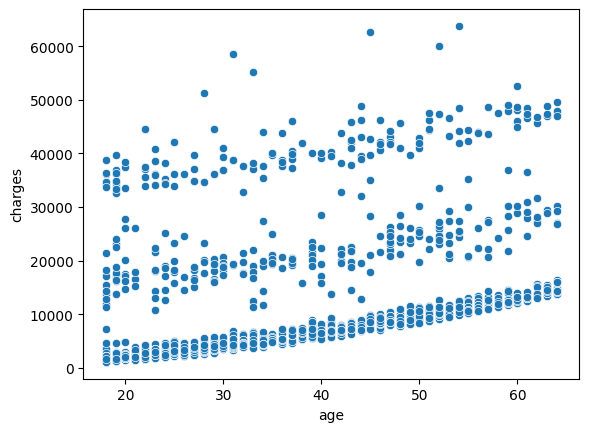

In [4]:
# plot scatterplot with age on x-axis and charges on y-axis
plt.figure()
sns.scatterplot(insurance_df, x = 'age', y = 'charges')
#plt.plot(x,y)
plt.show()
plt.close()

In [5]:
# import minmax scaler to normalize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
insurance_df = scaler.fit_transform(insurance_df)
insurance_df

array([[0.02173913, 0.25161076],
       [0.        , 0.00963595],
       [0.2173913 , 0.05311516],
       ...,
       [0.        , 0.00810808],
       [0.06521739, 0.01414352],
       [0.93478261, 0.44724873]])

In [6]:
# convert numpy array back to dataframe showing normalized data, min value = 0 and max value = 1
insurance_df = pd.DataFrame(insurance_df, columns = ["age", "charges"])
insurance_df.describe().round(2)

,age,charges
count,1338.00,1338.00
mean,0.46,0.19
std,0.31,0.19
min,0.00,0.00
25%,0.20,0.06
50%,0.46,0.13
75%,0.72,0.25
max,1.00,1.00


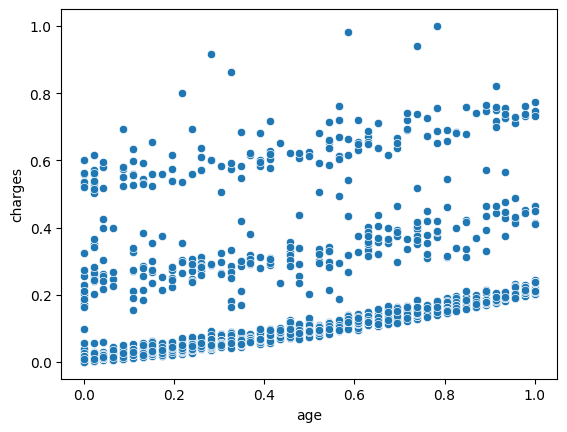

In [7]:
# plot scatterplot with normalized values of age and charges
plt.figure()
sns.scatterplot(insurance_df, x = 'age', y = 'charges')
#plt.plot(x,y)
plt.show()
plt.close()

In [8]:
# import standardscaler to standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
insurance_df = scaler.fit_transform(insurance_df)
insurance_df

array([[-1.43876426,  0.2985838 ],
       [-1.50996545, -0.95368917],
       [-0.79795355, -0.72867467],
       ...,
       [-1.50996545, -0.96159623],
       [-1.29636188, -0.93036151],
       [ 1.55168573,  1.31105347]])

In [9]:
# convert numpy array back to dataframe showing standardized data, mean = 0 and std = 1
insurance_df = pd.DataFrame(insurance_df, columns = ["age", "charges"])
insurance_df.describe().round(2)

,age,charges
count,1338.00,1338.00
mean,0.00,0.00
std,1.00,1.00
min,-1.51,-1.00
25%,-0.87,-0.70
50%,-0.01,-0.32
75%,0.84,0.28
max,1.77,4.17


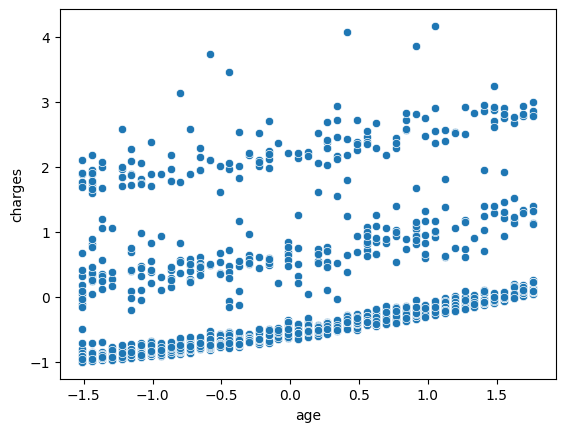

In [15]:
# plt scatterlot with normalized data 
plt.figure()
sns.scatterplot(insurance_df, x = 'age', y = 'charges')
#plt.plot(x,y)
plt.show()
plt.close()

In [10]:
#import linear regression from scikit learn and reshape array
from sklearn.linear_model import LinearRegression
X = insurance_df['age'].values.reshape(-1,1)
y = insurance_df['charges']

print(X)

[[-1.43876426]
 [-1.50996545]
 [-0.79795355]
 ...
 [-1.50996545]
 [-1.29636188]
 [ 1.55168573]]


In [11]:
# fit and predict 
simple_model = LinearRegression()
simple_model.fit(X,y)
y_pred = simple_model.predict(X)

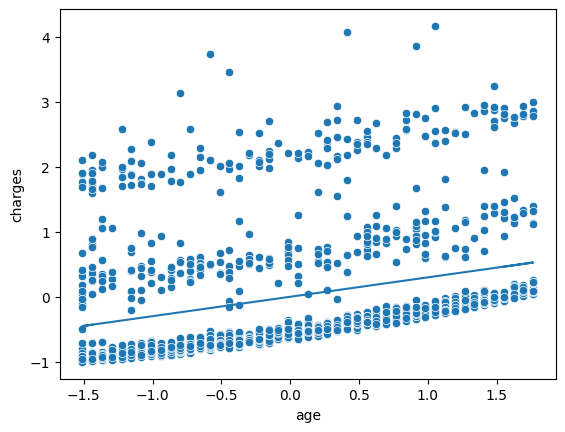

In [18]:
# plt scatterplot with line of best fit with predicted values of y
plt.figure()
sns.scatterplot(data = insurance_df, x = 'age', y = 'charges')
plt.plot(X,y_pred)
plt.show()
plt.close()

Observation: If we compare the scatterplots of raw data, normalized data and standarized data, they look very similar. 